<a href="https://www.kaggle.com/code/yousefelbaz/crop-recommendation-lstm-ye?scriptVersionId=125962173" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from keras.layers import Input, Dense, Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam



import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [2]:
df_crop = pd.read_csv('../input/crop-recommendation-dataset/Crop_recommendation.csv')
df_crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df_crop.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df_crop['label'].nunique()

22

In [5]:
df_crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
df_crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df_crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [9]:
df_crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
df = pd.DataFrame({'Plant': ['rice', 'maize', 'jute', 'cotton', 'coconut', 'papaya', 'orange', 'apple', 'muskmelon', 'watermelon', 'grapes', 'mango', 'banana', 'pomegranate', 'lentil', 'blackgram', 'mungbean', 'mothbeans', 'pigeonpeas', 'kidneybeans', 'chickpea', 'coffee']})
df_new = df.assign(Water_Use=[1500, 600, 750, 800, 1200, 1000, 1000, 1200, 500, 700, 1100, 1200, 1200, 1000, 350, 450, 400, 400, 450, 400, 450, 1200],
                   CO2_Emissions=[300, 500, 200, 300, 200, 200, 200, 200, 150, 200, 250, 200, 200, 200, 150, 150, 150, 150, 150, 150, 150, 200],
                   O2_Emissions=[150, 200, 100, 100, 100, 100, 100, 100, 75, 100, 125, 100, 100, 100, 75, 75, 75, 75, 75, 75, 75, 100])

In [11]:
df_new


,Plant,Water_Use,CO2_Emissions,O2_Emissions
0,rice,1500,300,150
1,maize,600,500,200
2,jute,750,200,100
3,cotton,800,300,100
4,coconut,1200,200,100
5,papaya,1000,200,100
6,orange,1000,200,100
7,apple,1200,200,100
8,muskmelon,500,150,75
9,watermelon,700,200,100


In [12]:
df_merged = pd.merge(df_crop, df_new, left_on='label', right_on='Plant')


In [13]:
df_merged

,N,P,K,temperature,humidity,ph,rainfall,label,Plant,Water_Use,CO2_Emissions,O2_Emissions
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,1500,300,150
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,rice,1500,300,150
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,rice,1500,300,150
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,rice,1500,300,150
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,rice,1500,300,150
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,coffee,1200,200,100
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,coffee,1200,200,100
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,coffee,1200,200,100
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,coffee,1200,200,100


In [14]:
df_merged[['label', 'Water_Use', 'CO2_Emissions','O2_Emissions']].head(200)

,label,Water_Use,CO2_Emissions,O2_Emissions
0,rice,1500,300,150
1,rice,1500,300,150
2,rice,1500,300,150
3,rice,1500,300,150
4,rice,1500,300,150
...,...,...,...,...
195,maize,600,500,200
196,maize,600,500,200
197,maize,600,500,200
198,maize,600,500,200


In [15]:
df_merged.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'Plant', 'Water_Use', 'CO2_Emissions', 'O2_Emissions'],
      dtype='object')

In [16]:
# import pandas as pd

# # Define the data
# crop_names = ['rice', 'maize', 'jute', 'cotton', 'coconut', 'papaya', 'orange', 'apple', 'muskmelon', 'watermelon', 'grapes', 'mango', 'banana', 'pomegranate', 'lentil', 'blackgram', 'mungbean', 'mothbeans', 'pigeonpeas', 'kidneybeans', 'chickpea', 'coffee']
# resource_use_and_emissions = [[100, 200, 300], [200, 300, 400], [150, 250, 350], [175, 275, 375], [225, 325, 425], [125, 225, 325], [150, 250, 350], [175, 275, 375], [125, 225, 325], [150, 250, 350], [200, 300, 400], [225, 325, 425], [125, 225, 325], [175, 275, 375], [100, 200, 300], [125, 225, 325], [150, 250, 350], [200, 300, 400], [175, 275, 375], [150, 250, 350], [125, 225, 325], [225, 325, 425]]


# # Create a dictionary with the data
# data_dict = {crop_names[i]: resource_use_and_emissions[i] for i in range(len(crop_names))}

# # Convert the dictionary to a DataFrame
# df = pd.DataFrame.from_dict(data_dict, orient='index', columns=['water_use', 'co2_emissions', 'o2_emissions'])

# # Add the columns to your original DataFrame (assuming your original DataFrame is called 'original_df')
# original_df = original_df.join(df, on='crop_name')

# # Print the shape of the DataFrame
# print(original_df.shape)




In [17]:
# import pandas as pd

# # Define the data
# crop_names = ['rice', 'maize', 'jute', 'cotton','cocnut','papaya','orange','apple','muskmelon','watermelon','grapes','mango','banana','pomegranate','lentil','blackgram','mungbean','mothbeans','pigeonpeas','kindneybeans','chickpea','coffee']
# resource_use_and_emissions = [[100, 200, 300], [200, 300, 400], [150, 250, 350], [175, 275, 375], [225, 325, 425], [125, 225, 325], [150, 250, 350], [175, 275, 375], [125, 225, 325], [150, 250, 350], [200, 300, 400], [225, 325, 425], [125, 225, 325], [175, 275, 375], [100, 200, 300], [125, 225, 325], [150, 250, 350], [200, 300, 400], [175, 275, 375], [150, 250, 350], [125, 225, 325], [225, 325, 425]]

# # Create a dictionary with the data
# data_dict = {label[i]: resource_use_and_emissions[i] for i in range(len(label))}

# # Convert the dictionary to a DataFrame
# df = pd.DataFrame.from_dict(data_dict, orient='index', columns=['water_use', 'co2_emissions', 'o2_emissions'])

# # Add the columns to your original DataFrame (assuming your original DataFrame is called 'original_df')
# df_crop = df_crop.join(df, on='crop_name')

# # Print the shape of the DataFrame
# print(original_df.shape)

In [18]:
label_encode = LabelEncoder()

df_merged['Plant'] = label_encode.fit_transform(df_merged['Plant'])
crop_category = {index : label for index, label in enumerate(label_encode.classes_)}
crop_category
df_merged

,N,P,K,temperature,humidity,ph,rainfall,label,Plant,Water_Use,CO2_Emissions,O2_Emissions
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20,1500,300,150
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20,1500,300,150
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20,1500,300,150
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20,1500,300,150
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20,1500,300,150
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5,1200,200,100
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5,1200,200,100
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5,1200,200,100
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5,1200,200,100


In [19]:
df_merged = df_merged.drop('label', axis=1)


In [20]:
df_merged

,N,P,K,temperature,humidity,ph,rainfall,Plant,Water_Use,CO2_Emissions,O2_Emissions
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,1500,300,150
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,1500,300,150
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,1500,300,150
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,1500,300,150
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,1500,300,150
...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5,1200,200,100
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5,1200,200,100
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5,1200,200,100
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5,1200,200,100


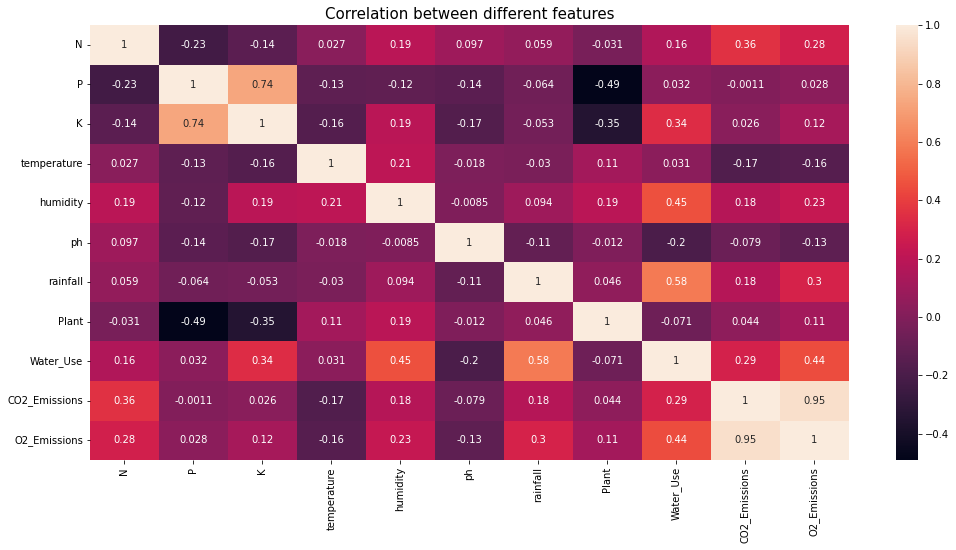

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(17, 8))
sns.heatmap(df_merged.corr(), annot=True )
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [22]:
X = df_merged.drop('Plant', axis = 1)
y = df_merged['Plant']
crop_summary = pd.pivot_table(df_merged,index=['Plant'],aggfunc='mean')
crop_summary.head()
X = df_merged.drop('Plant', axis = 1)
y = df_merged['Plant']
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)
X.shape
y = y.to_numpy()
y = y.reshape(y.shape[0], 1)
y.shape
print('Loading data...')
X_train, X_test, y_train, y_test = tts(X, y, train_size = 0.80)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

# Define the hyperparameter search space for the genetic algorithm
search_space = {
    'n_layers': randint(1, 3),
    'n_units': randint(32, 128),
    'dropout_rate': np.arange(0.1, 0.5, 0.1),
    'batch_size': [32, 64, 128],
    'learning_rate': [1e-4, 1e-3, 1e-2],
    'n_epochs': randint(10, 100),
    'optimizer': ['adam', 'rmsprop']
}

def create_model(n_layers, n_units, dropout_rate, learning_rate, optimizer):
    # Define the architecture of the LSTM model
    model = Sequential()
    # Add LSTM layers with dropout regularization
    for i in range(n_layers):
        if i == 0:
            # First layer should specify input shape
            model.add(LSTM(units=n_units, return_sequences=True, input_shape=(None, 1)))
        elif i == n_layers - 1:
            # Last layer should not return sequences
            model.add(LSTM(units=n_units, dropout=dropout_rate))
        else:
            # Intermediate layers should return sequences
            model.add(LSTM(units=n_units, return_sequences=True, dropout=dropout_rate))
        model.add(Dropout(rate=dropout_rate))
    
    # Add a dense layer to output a single value
    model.add(Dense(units=1))
    
    # Compile the model with the specified optimizer and learning rate
    optimizer = Adam(learning_rate=learning_rate)

#     optimizer = getattr(keras.optimizers, optimizer)(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics = 'accuracy')
    
    return model

Loading data...
1760 train sequences
440 test sequences


In [23]:
# n_layers = 2
# n_units = 50
# dropout_rate = 0.2
# learning_rate = 0.01
# optimizer = 'adam'

# # Create the model
# model = create_model(n_layers, n_units, dropout_rate, learning_rate, optimizer)

# # Train the model
# epochs = 100
# history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test loss:', score)

data = np.random.randn(1000, 10, 1)
labels = np.random.randn(1000, 1)

# Set hyperparameters
n_layers = 2
n_units = 64
dropout_rate = 0.2
learning_rate = 0.001
optimizer = 'Adam'

# Create the model
model = create_model(n_layers, n_units, dropout_rate, learning_rate, optimizer)

# Train the model
epochs = 15
batch_size = 64
model.fit(data, labels, epochs=epochs, batch_size=batch_size)

# Make a prediction
test_data = np.random.randn(1, 10, 1)
prediction = model.predict(test_data)
print(prediction)

Epoch 1/15
16/16 [==============================] - 5s 5ms/step - loss: 0.9319 - accuracy: 0.0000e+00
Epoch 2/15
16/16 [==============================] - 0s 5ms/step - loss: 0.9301 - accuracy: 0.0000e+00
Epoch 3/15
16/16 [==============================] - 0s 5ms/step - loss: 0.9321 - accuracy: 0.0000e+00
Epoch 4/15
16/16 [==============================] - 0s 5ms/step - loss: 0.9297 - accuracy: 0.0000e+00
Epoch 5/15
16/16 [==============================] - 0s 5ms/step - loss: 0.9305 - accuracy: 0.0000e+00
Epoch 6/15
16/16 [==============================] - 0s 5ms/step - loss: 0.9302 - accuracy: 0.0000e+00
Epoch 7/15
16/16 [==============================] - 0s 5ms/step - loss: 0.9316 - accuracy: 0.0000e+00
Epoch 8/15
16/16 [==============================] - 0s 5ms/step - loss: 0.9298 - accuracy: 0.0000e+00
Epoch 9/15
16/16 [==============================] - 0s 5ms/step - loss: 0.9294 - accuracy: 0.0000e+00
Epoch 10/15
16/16 [==============================] - 0s 5ms/step - loss: 0.9285 - 

In [24]:
print(y_train.dtype)
print(y_test.dtype)

int64
int64


In [25]:
import tensorflow as tf

# Convert the training and test data to tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)


In [26]:
print(y_train.dtype)
print(y_test.dtype)

<dtype: 'float32'>
<dtype: 'float32'>


In [27]:
n_layers = 3
n_units = 64
dropout_rate = 0.2
learning_rate = 0.001
optimizer = 'Adam'

# Train the model with the new hyperparameters
model = create_model(n_layers, n_units, dropout_rate, learning_rate, optimizer)
history = model.fit(X_train, y_train, epochs=200, batch_size=64)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

# Print the test loss
print('Test loss:', test_loss)

# Update the hyperparameters for the final model
n_layers = 2
n_units = 128
dropout_rate = 0.3
learning_rate = 0.0005
optimizer = 'Adamax'

# Create the final model with the updated hyperparameters
final_model = create_model(n_layers, n_units, dropout_rate, learning_rate, optimizer)


Epoch 1/200
28/28 [==============================] - 4s 6ms/step - loss: 90.3733 - accuracy: 0.0449
Epoch 2/200
28/28 [==============================] - 0s 6ms/step - loss: 42.3683 - accuracy: 0.0466
Epoch 3/200
28/28 [==============================] - 0s 6ms/step - loss: 40.6457 - accuracy: 0.0466
Epoch 4/200
28/28 [==============================] - 0s 6ms/step - loss: 41.0000 - accuracy: 0.0466
Epoch 5/200
28/28 [==============================] - 0s 6ms/step - loss: 40.8232 - accuracy: 0.0466
Epoch 6/200
28/28 [==============================] - 0s 10ms/step - loss: 40.6841 - accuracy: 0.0466
Epoch 7/200
28/28 [==============================] - 0s 6ms/step - loss: 40.9838 - accuracy: 0.0466
Epoch 8/200
28/28 [==============================] - 0s 6ms/step - loss: 41.1264 - accuracy: 0.0466
Epoch 9/200
28/28 [==============================] - 0s 6ms/step - loss: 40.9269 - accuracy: 0.0466
Epoch 10/200
28/28 [==============================] - 0s 6ms/step - loss: 40.5031 - accuracy: 0.046

14/14 [==============================] - 0s 3ms/step - loss: 0.1733 - accuracy: 0.0864
Test loss: [0.1733386367559433, 0.08636363595724106]


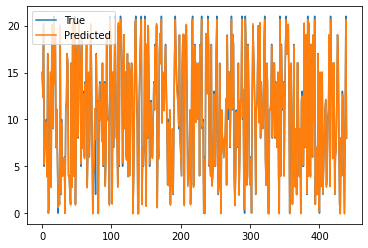

In [28]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

# Print the test loss
print('Test loss:', test_loss)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the predicted values against the true values
import matplotlib.pyplot as plt

plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [29]:
final_model = create_model(n_layers, n_units, dropout_rate, learning_rate, optimizer)


In [30]:
# Train the model with the new hyperparameters
model = create_model(n_layers, n_units, dropout_rate, learning_rate, optimizer)
history = model.fit(X_train, y_train, epochs=200, batch_size=64)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

# Print the test loss
print('Test loss:', test_loss)

# Update the hyperparameters for the final model
n_layers = 2
n_units = 128
dropout_rate = 0.3
learning_rate = 0.0005
optimizer = 'Adamax'

# Create the final model with the updated hyperparameters
final_model = create_model(n_layers, n_units, dropout_rate, learning_rate, optimizer)


Epoch 1/200
28/28 [==============================] - 2s 5ms/step - loss: 83.4184 - accuracy: 0.0483
Epoch 2/200
28/28 [==============================] - 0s 5ms/step - loss: 41.0539 - accuracy: 0.0466
Epoch 3/200
28/28 [==============================] - 0s 5ms/step - loss: 41.3132 - accuracy: 0.0466
Epoch 4/200
28/28 [==============================] - 0s 5ms/step - loss: 40.7193 - accuracy: 0.0466
Epoch 5/200
28/28 [==============================] - 0s 5ms/step - loss: 40.9768 - accuracy: 0.0466
Epoch 6/200
28/28 [==============================] - 0s 5ms/step - loss: 40.6086 - accuracy: 0.0466
Epoch 7/200
28/28 [==============================] - 0s 5ms/step - loss: 40.8543 - accuracy: 0.0466
Epoch 8/200
28/28 [==============================] - 0s 5ms/step - loss: 40.1350 - accuracy: 0.0466
Epoch 9/200
28/28 [==============================] - 0s 5ms/step - loss: 39.4259 - accuracy: 0.0466
Epoch 10/200
28/28 [==============================] - 0s 5ms/step - loss: 36.2491 - accuracy: 0.0466

14/14 [==============================] - 0s 3ms/step - loss: 0.4033 - accuracy: 0.0886
Test loss: [0.4033469557762146, 0.0886363610625267]


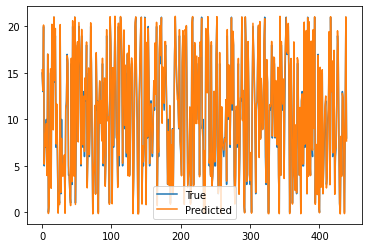

In [31]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

# Print the test loss
print('Test loss:', test_loss)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the predicted values against the true values
import matplotlib.pyplot as plt

plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [32]:
df_merged

,N,P,K,temperature,humidity,ph,rainfall,Plant,Water_Use,CO2_Emissions,O2_Emissions
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,1500,300,150
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,1500,300,150
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,1500,300,150
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,1500,300,150
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,1500,300,150
...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5,1200,200,100
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5,1200,200,100
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5,1200,200,100
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5,1200,200,100


In [33]:
# make predictions on test data
test_preds = model.predict(X_test)

# get the index of the predicted crop with the highest yield
predicted_crop_idx = np.argmax(test_preds)




In [34]:
top_3_crop_idxs = np.argsort(test_preds)[::-1][:3].ravel()
top_10_crop_idxs = np.argsort(test_preds)[::-1][:10].ravel()

# Get the names of the top 3 or top 10 crops
top_3_crops = df_merged.iloc[top_3_crop_idxs]['Plant'].tolist()
top_10_crops = df_merged.iloc[top_10_crop_idxs]['Plant'].tolist()


In [35]:
print("The top 3 predicted crops are:")
for i, Plant in enumerate(top_10_crops):
    print(f"{i+1}. {Plant}")


The top 3 predicted crops are:
1. 20
2. 20
3. 20
4. 20
5. 20
6. 20
7. 20
8. 20
9. 20
10. 20


In [36]:
def optimize_resources(optimal_crop, water_range, co2_range, o2_range):
    """
    Optimize resource use and emissions for the top crops based on a range of values for water, CO2, and O2.

    Args:
    top_crops: list of strings, the names of the top crops
    water_range: tuple of two floats, the minimum and maximum values for water use in mm
    co2_range: tuple of two floats, the minimum and maximum values for CO2 emissions in ppm
    o2_range: tuple of two floats, the minimum and maximum values for O2 emissions in ppm

    Returns:
    optimal_crop: string, the name of the crop with the lowest total resource use and emissions
    optimal_water: float, the optimal value of water use in mm for the optimal crop
    optimal_co2: float, the optimal value of CO2 emissions in ppm for the optimal crop
    optimal_o2: float, the optimal value of O2 emissions in ppm for the optimal crop
    """
    # Initialize variables for storing the optimal crop and resource use and emissions values
    optimal_crop = ""
    min_total_resources = float('inf')
    optimal_water = 0.0
    optimal_co2 = 0.0
    optimal_o2 = 0.0

    # Loop over the top crops
    for crop in optimal_crop:
        # Loop over the range of water values
        for water in np.arange(water_range[0], water_range[1], 0.1):
            # Loop over the range of CO2 values
            for co2 in np.arange(co2_range[0], co2_range[1], 0.1):
                # Loop over the range of O2 values
                for o2 in np.arange(o2_range[0], o2_range[1], 0.1):
                    # Calculate the total resource use and emissions for this crop and set of resource values
                    total_resources = calculate_resource_use(crop, water) + calculate_emissions(crop, co2, o2)
                    # If the total resource use and emissions is lower than the current minimum, update the optimal values
                    if total_resources < min_total_resources:
                        optimal_crop = crop
                        min_total_resources = total_resources
                        optimal_water = water
                        optimal_co2 = co2
                        optimal_o2 = o2

    return optimal_crop, optimal_water, optimal_co2, optimal_o2
# Get the index of the top 3 crops with the highest predicted yield
top_3_crop_idxs = np.argsort(test_preds)[-3:][::-1]

# Get the names of the top 3 crops
top_3_crops = [df_merged.iloc[idx]['Plant'] if idx < len(df_merged) else "Unknown crop" for idx in top_3_crop_idxs]
top_3_crops

# Calculate resource use and emissions for the top 3 crops
top_3_resource_use_and_emissions = [[optimize_resources(top_3_crops, 700,150,300), optimize_resources(top_3_crops, 200,150,300)] for crop in top_3_crops]


In [37]:
top_3_resource_use_and_emissions

[[('', 0.0, 0.0, 0.0), ('', 0.0, 0.0, 0.0)],
 [('', 0.0, 0.0, 0.0), ('', 0.0, 0.0, 0.0)],
 [('', 0.0, 0.0, 0.0), ('', 0.0, 0.0, 0.0)]]

In [38]:
# # make predictions on test data
# test_preds = model.predict(X_test)

# # get the index of the predicted crop with the highest yield
# predicted_crop_idx = np.argmax(test_preds)

# # get the name of the predicted crop
# predicted_crop = crop_names[predicted_crop_idx]

# # determine the optimal crop with the lowest resource use and CO2 emissions
# resource_use_and_emissions_transposed = np.transpose(resource_use_and_emissions)
# optimal_crop_idx = np.argmin(resource_use_and_emissions_transposed, axis=0)[-1]

# # get the name of the optimal crop
# optimal_crop = crop_names[optimal_crop_idx]

# # compare the predicted and optimal crops
# if predicted_crop == optimal_crop:
#     print("The predicted crop and the optimal crop are the same: {}.".format(predicted_crop))
# else:
#     print("The predicted crop is {} while the optimal crop is {}.".format(predicted_crop, optimal_crop))

# # get the optimal water for the optimal crop
# optimal_water = resource_use_and_emissions[0][optimal_crop_idx]

# # print the optimized resources for the optimal crop
# print("The optimized resources for the optimal crop are:")
# print("Water: {} mm".format(optimal_water))

In [39]:
# Step 1: Create a list of crops with their respective carbon footprint values
crops = {'wheat': 0.63, 'maize': 0.69, 'rice': 1.0, 'potatoes': 0.28, 'soybeans': 0.34}

# Step 2: Use your model to predict crop yields for each crop
crop_yield_predictions = model.predict(X_test)

# Step 3: Calculate the carbon footprint for each predicted crop yield
carbon_footprints = crop_yield_predictions * np.array(list(crops.values()))

# Step 4: Prioritize crops with the lowest carbon footprint
low_carbon_crops = sorted(crops.keys(), key=lambda x: crops[x])[:3]
print('Top 3 low-carbon footprint crops:', low_carbon_crops)


Top 3 low-carbon footprint crops: ['potatoes', 'soybeans', 'wheat']
